<a href="https://colab.research.google.com/github/Alexfdn/HW1_puthon/blob/main/HW%201-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"

### Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


In [51]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Список объектов

In [53]:
offset_ = 1
limit_ = 5000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()
objects_data.get('data').get('list')[0]

{'objId': 13383,
 'developer': {'devId': 306,
  'shortName': '2МЕН ГРУПП',
  'fullName': '2МЕН ГРУПП',
  'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
  'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'},
  'companyGroup': 5776,
  'devInn': '7701651356'},
 'rpdRegionCd': 72,
 'objAddr': 'г Тюмень',
 'objFloorMin': 4,
 'objFloorMax': 20,
 'objElemLivingCnt': 68,
 'objReady100PercDt': '2022-12-31',
 'objSquareLiving': 6293.78,
 'objCompensFundFlg': 1,
 'objProblemFlg': 0,
 'latitude': 57.1519,
 'longitude': 65.5536,
 'problemFlag': 'NONE',
 'siteStatus': 'Строящиеся',
 'objGuarantyEscrowFlg': 0,
 'residentialBuildings': 1,
 'rpdNum': '72-000095',
 'pdId': 28105,
 'buildType': 'Жилое',
 'objStatus': 0}

In [ ]:
objects_list = objects_data.get('data').get('list')
objids = [x.get('objId') for x in objects_list]
objids[:5000]

### Данные по определенному объекту

In [55]:
df = []
for i in range(len(objids)):
    url_obj = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objids[i]}'
    try:
        res_obj = requests.get(url_obj)
        obj_data = res_obj.json()
        img_list = obj_data.get('data').get('photoRenderDTO')
        res_img = img_list[0].get('objRenderPhotoUrl')
        obj_data.get('data')['img'] = res_img
        df.append(obj_data.get('data'))
    except:
        continue

In [56]:
df = pd.json_normalize(df, max_level=3)

In [57]:
df.head()

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,13383,28105,72,г Тюмень,4,20,68,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,28101,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df['img']

0       https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
1       https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
2       https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
3       https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
4       https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
                              ...                        
4982    https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
4983    https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
4984    https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
4985    https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
4986    https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...
Name: img, Length: 4987, dtype: object

In [59]:
df.to_csv('set.csv', index=0)
df.to_excel("set.xlsx", index=True, header=True)

### Задание 2
* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков

In [60]:
df_set = pd.read_csv('set.csv')
df_set.head()

,id,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,13383,28105,72,г Тюмень,4,20,68,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,Без отделки,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,28101,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,По желанию заказчика,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверка на наличие пропусков

In [115]:
df_set.isnull().sum()

id                 0
pdId               0
region             0
address           25
floorMin           0
                ... 
metro.color     4825
metro.time      4825
metro.isWalk    4825
metro.colors    4825
region_name        0
Length: 111, dtype: int64

In [116]:
df_set.isnull().sum(). sum()

89108

In [61]:
reg = requests.get('https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/dictionary/regions').json() 
reg_name, reg_id = [], []
for region in reg:
    reg_name.append(region.get('name'))
    reg_id.append(region.get('id'))
df_set = df_set.merge(pd.DataFrame(zip(reg_name, reg_id), columns=['region_name', 'region']))

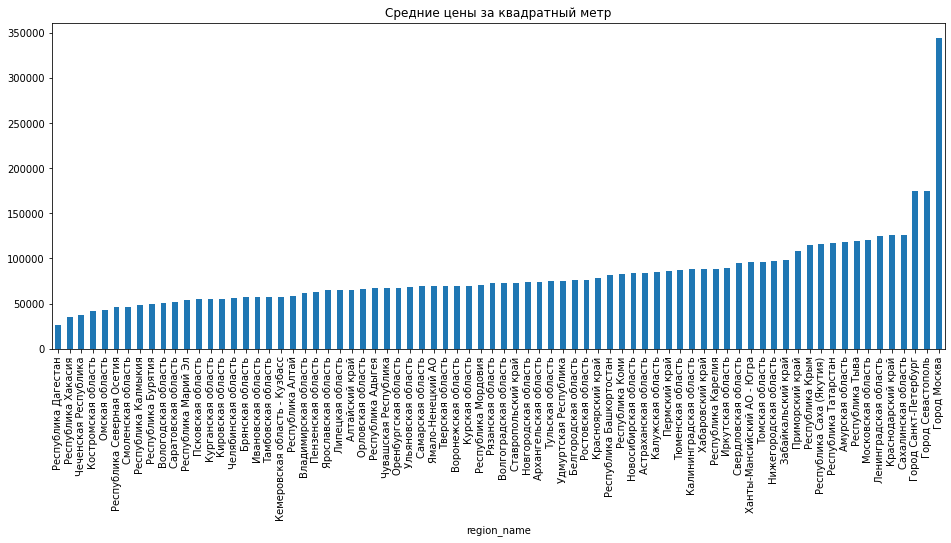

In [66]:
price = df_set.loc[df_set['objPriceAvg'].notna()].groupby('region_name')['objPriceAvg'].mean()
plt.subplots(figsize=(16, 6))
price.sort_values().plot(kind='bar')
plt.title('Средние цены за квадратный метр')
plt.show()

Вывод: наибольшая средняя цена в г. Москве, наименьшая - в Дагестане.

Топ 3 региона по стоимости квадратного метра строящегося жилья: г. Москва, г. Санкт-Петербург, г. Севастополь

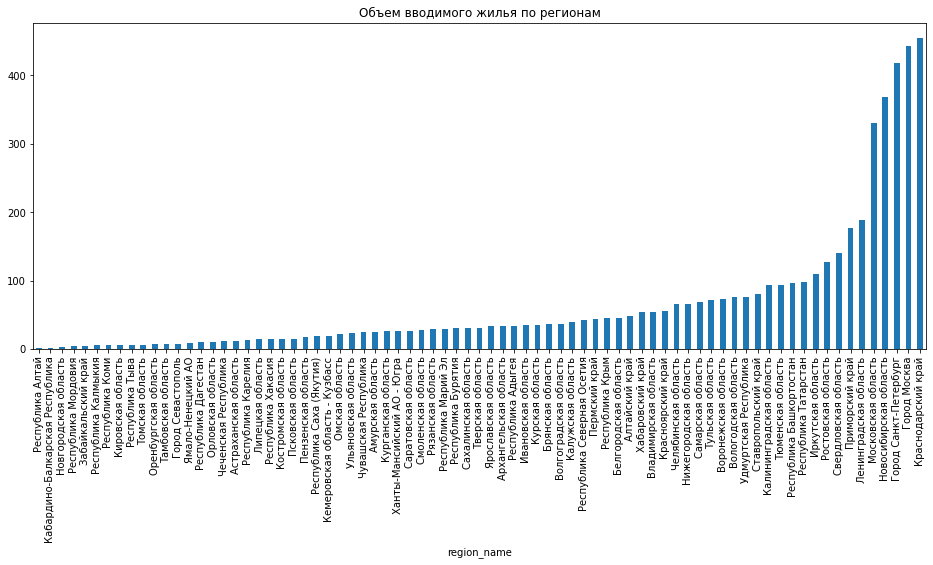

In [102]:
volume = df_set.groupby('region_name')['objReady100PercDt'].count()
plt.subplots(figsize=(16, 6))
volume.sort_values().plot(kind='bar')
plt.title('Объем вводимого жилья по регионам')
plt.show()

Вывод: в Краснодарском крае вводится наибольший объем жилья, наименьший объем - в республике Алтай.

Топ 5 регионов по объемму вводимого жилья: Краснодарский край, г. Москва, г. Санкт-Петербург, Новосибирская область, Московская область.

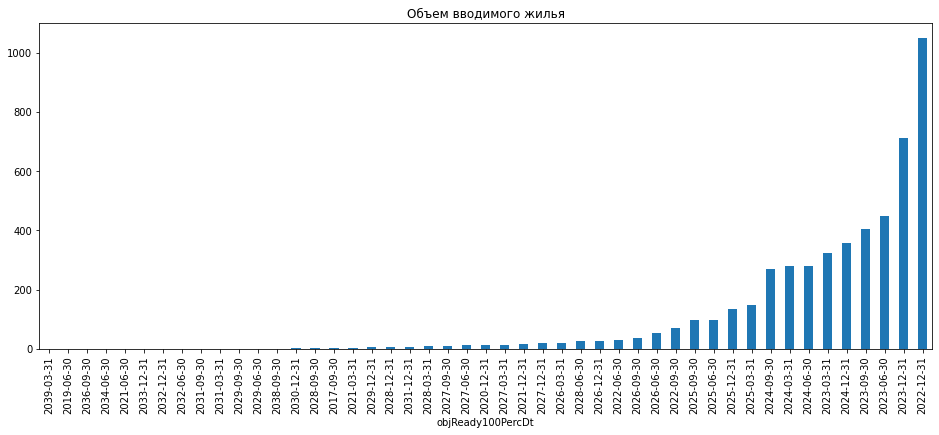

In [103]:
df_set['objReady100PercDt'] = pd.to_datetime(df_set['objReady100PercDt'], format="%Y/%m/%d")
df_set.loc[:, 'objReady100PercDt'] = df_set.loc[:, 'objReady100PercDt'].dt.year
volume = df.groupby('objReady100PercDt')['objReady100PercDt'].count()
plt.subplots(figsize=(16, 6))
volume.sort_values().plot(kind='bar')
plt.title('Объем вводимого жилья')
plt.show()

Вывод: на конец 2022 года планируется введения наибольшего объема жилья, относительно других рассматриваемых периодов.

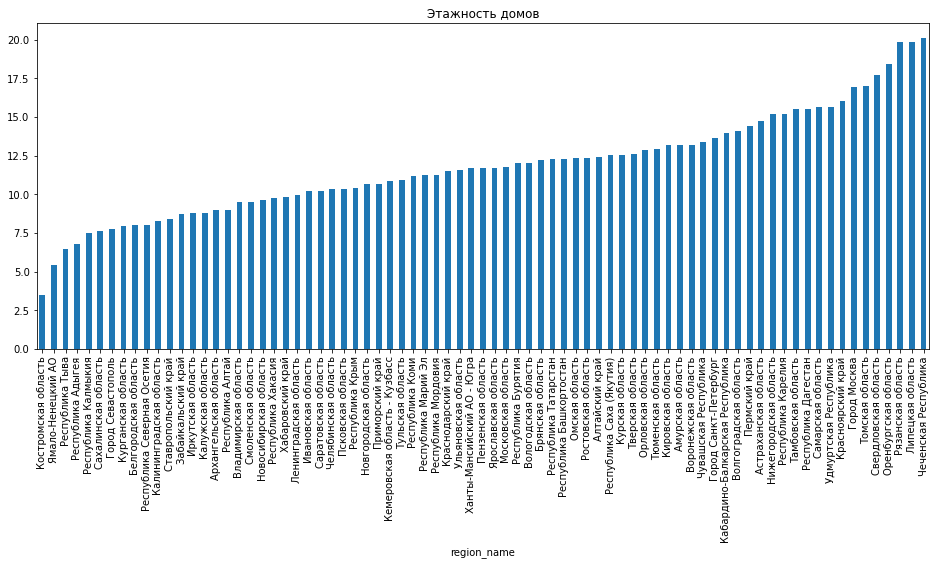

In [71]:
floors = df_set.loc[df_set['objFloorCnt'].notna()].groupby('region_name')['objFloorCnt'].mean()
plt.subplots(figsize=(16, 6))
floors.sort_values().plot(kind='bar')
plt.title('Этажность домов')
plt.show()

Вывод: наибольшая средняя этажность строящихся объектов в следующих регионах - Чеченская республика, Липецкая область, Рязанская область. Наименьшая средняя этажность - Костромская область.

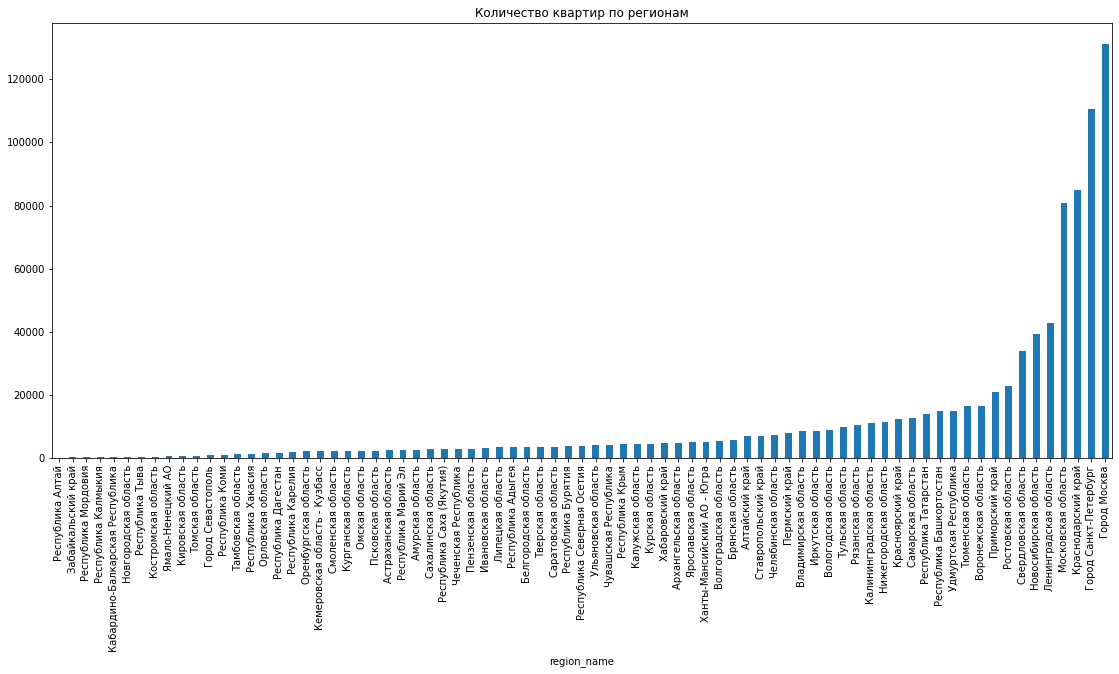

In [96]:
flats = df_set.loc[df_set['objFlatCnt'].notna()].groupby('region_name')['objFlatCnt'].sum()
plt.subplots(figsize=(19, 8))
flats.sort_values().plot(kind='bar')
plt.title('Количество квартир по регионам')
plt.show()

Вывод: наибольшее количество строящихся квартир в Москве, наименьшее - республике Алтай.

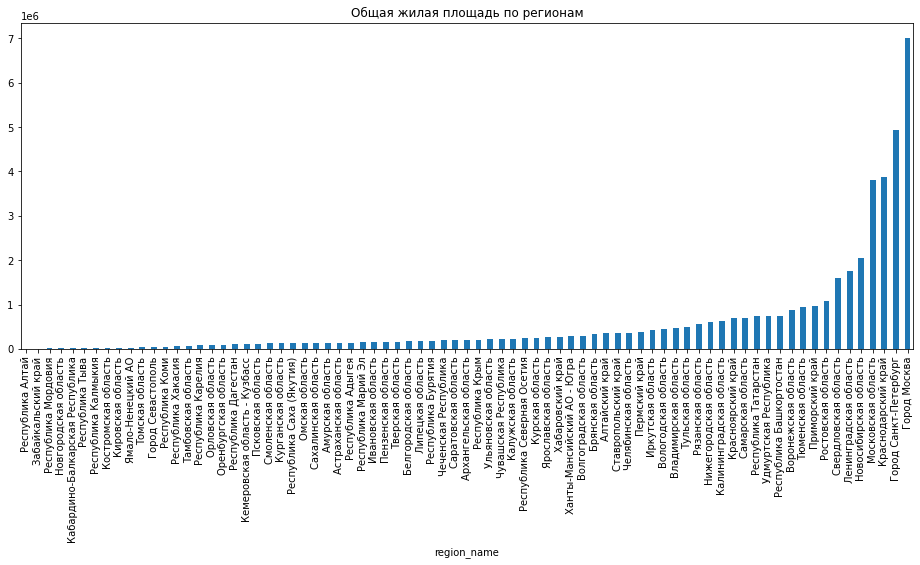

In [100]:
area = df_set.loc[df['objSquareLiving'].notna()].groupby('region_name')['objSquareLiving'].sum()
plt.subplots(figsize=(16, 6))
area.sort_values().plot(kind='bar')
plt.title('Общая жилая площадь по регионам')
plt.show()

Вывод: наибольшая общая жилая площадь в строящихся объектах в Москве, наименьшее - республике Алтай.

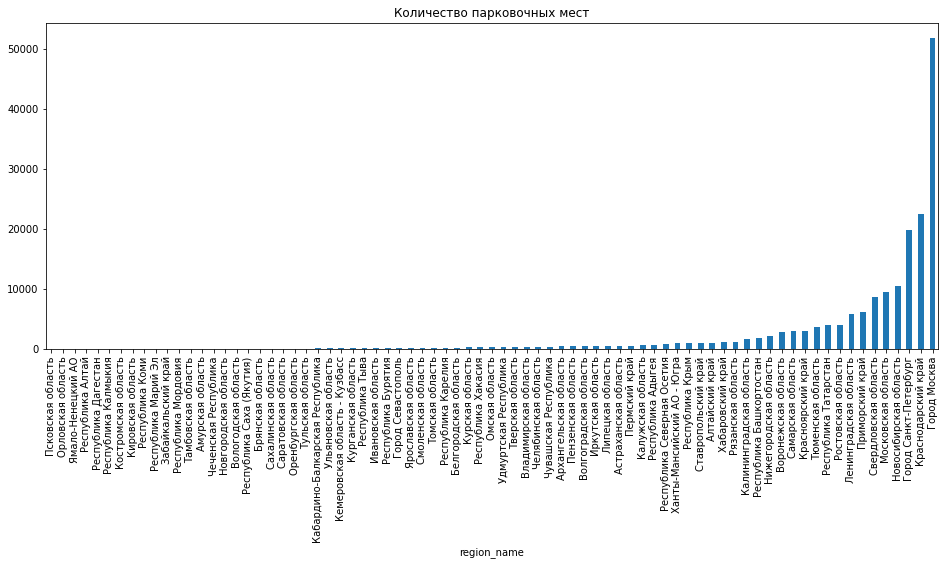

In [112]:
parking = df_set.loc[df['objElemParkingCnt'].notna()].groupby('region_name')['objElemParkingCnt'].sum()
plt.subplots(figsize=(16, 6))
parking.sort_values().plot(kind='bar')
plt.title('Количество парковочных мест')
plt.show()

Вывод: наибольшее количество парковочных мест в строящихся объектах в Москве.